In [27]:
from skimage import io
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skimage import img_as_ubyte
from skimage.transform import resize

# from kivy.uix.image import Image


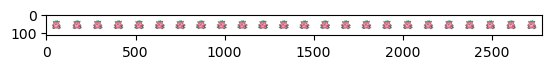

In [3]:
path = '/Users/pabloherrero/Documents/ManHatTan/gui/Graphics/Battlers/'
nid = 94
impath = path+str(nid).zfill(3)+'.png'
img = io.imread(impath)
plt.imshow(img)


In [4]:
size_frame = img.shape[0]
nframes = int(img.shape[1] / size_frame)
nframes

24

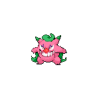

In [5]:
nframe = 5
plt.figure(figsize=(1, 1))
plt.imshow(img[:, img.shape[0] * nframe: img.shape[0] * (nframe+1) , :])
plt.axis('off')
fram = img[:, img.shape[0] * nframe: img.shape[0] * (nframe+1) , :]

In [24]:
def image_to_texture(frame):
    """
    Convert a NumPy array (frame) to a Kivy Texture.
    """

    size_frame = frame.shape[0]
    nframes = int(frame.shape[1] / size_frame)
    # Add an alpha channel to convert RGB to RGBA
    if frame.shape[2] == 3:  # If the image has 3 channels (RGB)
        alpha_channel = np.ones((fram.shape[0], fram.shape[1], 1), dtype=np.uint8) * 255  # Fully opaque
        frame_rgba = np.concatenate((fram, alpha_channel), axis=-1)
    elif frame.shape[2] == 4:  # If the image has an alpha channel
        frame_rgba = frame[:, :, :3]  # Keep only RGB channels
    else:
        print('Shape: ', frame.shape[2])
    
    # Convert image to 8-bit unsigned integers
    frame_byte = img_as_ubyte(frame_rgba)
    upscaled_image = resize(frame_byte, (400, 400*nframes, 3), anti_aliasing=True)
    # Create a texture and upload data
    # texture = Texture.create(size=(frame.shape[1], frame.shape[0]))
    # texture.blit_buffer(frame.tobytes(), colorfmt='rgba', bufferfmt='ubyte')
    # texture.flip_vertical()  # Flip texture for correct display in Kivy
    # return texture
    return upscaled_image

(-0.5, 9599.5, 399.5, -0.5)

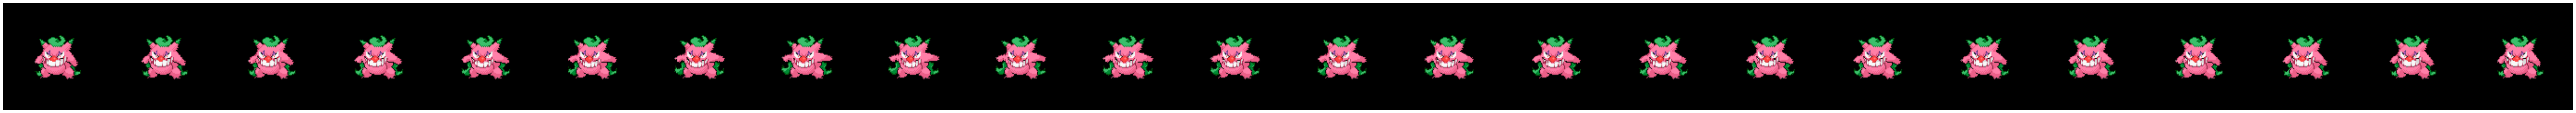

In [25]:
upim = image_to_texture(img)

plt.figure(figsize=(100,100))
plt.imshow(upim)
plt.axis(False)


In [26]:
upim.shape

(400, 9600, 3)

(-0.5, 115.5, 115.5, -0.5)

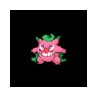

In [10]:
upim = image_to_texture(fram)

plt.figure(figsize=(1,1))
plt.imshow(upim)
plt.axis(False)


TypeError: Invalid shape (116, 116, 5) for image data

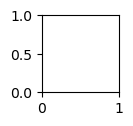

In [14]:
# alpha_channel = np.ones((fram.shape[0], fram.shape[1], 1), dtype=fram.dtype)  # Alpha = 1 (opaque)
# frame = np.concatenate((fram, alpha_channel), axis=2)  # Combine RGB with Alpha

alpha_channel = np.ones((fram.shape[0], fram.shape[1], 1), dtype=np.uint8) * 255  # Fully opaque
frame_rgba = np.concatenate((fram, alpha_channel), axis=-1)
plt.figure(figsize=(1,1))
plt.imshow(frame_rgba)
plt.axis(False)


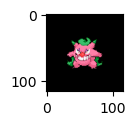

In [12]:
frame =  image_to_texture(fram)
plt.figure(figsize=(1, 1))
plt.imshow(frame)

In [13]:
upscaled_image = resize(frame, (300, 300, 3), anti_aliasing=True)

In [58]:
np.random.randint(900)

160

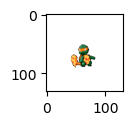

In [53]:
PATH_ANIM = '/Users/pabloherrero/Documents/ManHatTan/gui/Graphics/Battlers/'

nid = 7
impath = PATH_ANIM+str(nid).zfill(3)+'.png'
anim = io.imread(impath)
nframe = 0
frame = anim[:, anim.shape[0] * nframe: anim.shape[0] * (nframe+1) , :]
plt.figure(figsize=(1,1))
plt.imshow(frame)

In [7]:
class SpritePicture:
    def __init__(self, viewport, picture):
        self.viewport = viewport
        self.picture = picture
        self.sprite = None
        self.picture_name = None
        self.update()

    def dispose(self):
        if self.sprite:
            self.sprite.dispose()

    def update(self):
        if self.sprite:
            self.sprite.update()
        
        # If picture file name is different from the current one
        if self.picture_name != self.picture.name:
            # Remember file name to instance variable
            self.picture_name = self.picture.name
            
            # If file name is not empty
            if self.picture_name != "":
                # Get picture graphic
                if not self.sprite:
                    self.sprite = IconSprite(0, 0, self.viewport)
                self.sprite.set_bitmap(f"Graphics/Pictures/{self.picture_name}")
        
        # If file name is empty
        if self.picture_name == "":
            # Set sprite to invisible
            if self.sprite:
                self.sprite.dispose()
                self.sprite = None
            return
        
        # Set sprite to visible
        self.sprite.visible = True
        
        # Set transfer starting point
        if self.picture.origin == 0:
            self.sprite.ox = 0
            self.sprite.oy = 0
        else:
            self.sprite.ox = self.sprite.bitmap.width // 2
            self.sprite.oy = self.sprite.bitmap.height // 2
        
        # Set sprite coordinates
        self.sprite.x = self.picture.x
        self.sprite.y = self.picture.y
        self.sprite.z = self.picture.number
        
        # Set zoom rate, opacity level, and blend method
        self.sprite.zoom_x = self.picture.zoom_x / 100.0
        self.sprite.zoom_y = self.picture.zoom_y / 100.0
        self.sprite.opacity = self.picture.opacity
        self.sprite.blend_type = self.picture.blend_type
        
        # Set rotation angle and color tone
        self.sprite.angle = self.picture.angle
        self.sprite.tone = self.picture.tone


In [44]:
lipstick_path = '/Users/pabloherrero/Documents/ManHatTan/data/processed/LIPSTICK/hebrew_db.lip'
lip = pd.read_csv(lipstick_path)
pred0  = lip['p_recall'].copy()
lip['timestamp']

0      1736957029
1      1736957029
2      1737649086
3      1736957029
4      1737563843
          ...    
221    1737216888
222    1737132998
223    1737217820
224    1737224651
225    1737132919
Name: timestamp, Length: 226, dtype: int64

In [49]:
pred_arr = np.array(pred)
prob = pd.Series({i : p for i,p in enumerate(pred_arr)})
lip.loc[:, 'p_pred'] = prob
lip


,p_recall,timestamp,delta,user_id,learning_language,ui_language,word_ll,word_ul,lexeme_string,history_seen,...,session_correct,p_pred,mdt_history,mdt_correct,mrt_history,mrt_correct,wdt_history,wdt_correct,wrt_history,wrt_correct
0,0.000000,1736957029,0,pablo,iw,en,נושא,subject,lernt/lernen<vblex><pri><p3><sg>,0,...,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,1736957029,0,pablo,iw,en,המצב,situation,lernt/lernen<vblex><pri><p3><sg>,0,...,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.666667,1737649086,692057,pablo,iw,en,להישאר,stay,lernt/lernen<vblex><pri><p3><sg>,3,...,0,0.666667,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,1736957029,0,pablo,iw,en,שנאה,hatred,lernt/lernen<vblex><pri><p3><sg>,0,...,0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,1737563843,606814,pablo,iw,en,מדהים,Amazing,lernt/lernen<vblex><pri><p3><sg>,1,...,0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,1.000000,1737216888,259859,pablo,iw,en,ההגנה,defense,lernt/lernen<vblex><pri><p3><sg>,1,...,0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
222,1.000000,1737132998,175969,pablo,iw,en,שורשים,roots,lernt/lernen<vblex><pri><p3><sg>,1,...,0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
223,1.000000,1737217820,260791,pablo,iw,en,מסורת,tradition,lernt/lernen<vblex><pri><p3><sg>,1,...,0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
224,1.000000,1737224651,267622,pablo,iw,en,לצפות,expect,lernt/lernen<vblex><pri><p3><sg>,1,...,0,1.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [48]:
prob

0      0.000000
1      0.000000
2      0.666667
3      0.000000
4      0.000000
         ...   
221    1.000000
222    1.000000
223    1.000000
224    1.000000
225    1.000000
Length: 226, dtype: float64